<a href="https://colab.research.google.com/github/Pablocodes1993/finalproject/blob/main/Data_merge_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIBRARY IMPORTATION

In [ ]:
#Library Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from datetime import timedelta
from sklearn.impute import KNNImputer

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score, silhouette_samples



%matplotlib inline

# DATA IMPORTATION

In [ ]:
# Datasets importation from Google Drive folder
#Customer Dataset
customers_url = 'https://drive.google.com/file/d/1trjIdykod5jlh4JCk7ZRSoKXFvovra68/view?usp=share_link'
customers_path = 'https://drive.google.com/uc?export=download&id='+customers_url.split('/')[-2]
customers_data = pd.read_csv(customers_path)
#Geolocation Dataset
geolocation_url = 'https://drive.google.com/file/d/1g635f6qGuFpqtIKe63ss2X6YgOHSLDLR/view?usp=share_link'
geolocation_path = 'https://drive.google.com/uc?export=download&id='+geolocation_url.split('/')[-2]
geolocation_data = pd.read_csv(geolocation_path)
#Items Dataset
items_url = 'https://drive.google.com/file/d/18acVf2ciN0As5Q5GbA2PnO6HyF_dOrz4/view?usp=share_link'
items_path = 'https://drive.google.com/uc?export=download&id='+items_url.split('/')[-2]
items_data = pd.read_csv(items_path)
#Payments Dataset
payments_url = 'https://drive.google.com/file/d/1CH48eJjls-_gfjMPXAAxtx1Sh0cGUq67/view?usp=share_link'
payments_path = 'https://drive.google.com/uc?export=download&id='+payments_url.split('/')[-2]
payments_data = pd.read_csv(payments_path)
#Reviews Dataset
reviews_url = 'https://drive.google.com/file/d/14EEawWIHYafD-kLbJUVeYIM9L-c1nw24/view?usp=share_link'
reviews_path = 'https://drive.google.com/uc?export=download&id='+reviews_url.split('/')[-2]
reviews_data = pd.read_csv(reviews_path)
# Orders Dataset
orders_url = 'https://drive.google.com/file/d/1QVPJERDEvBFq6tLPEvfH-OfhdHOWQV67/view?usp=share_link'
orders_path = 'https://drive.google.com/uc?export=download&id='+orders_url.split('/')[-2]
orders_data = pd.read_csv(orders_path)

# Products Dataset
products_url = 'https://drive.google.com/file/d/1HlLVfY8GrjIxRXsvqm8FaIdJS4WIIL1Q/view?usp=share_link'
products_path = 'https://drive.google.com/uc?export=download&id='+products_url.split('/')[-2]
products_data = pd.read_csv(products_path)
# Sellers Dataset
sellers_url = 'https://drive.google.com/file/d/18s2z6P6noAyaRSK2ttTsU_g3porLucOg/view?usp=share_link'
sellers_path = 'https://drive.google.com/uc?export=download&id='+sellers_url.split('/')[-2]
sellers_data= pd.read_csv(sellers_path)
# Sellers Dataset
category_name_trans_url= 'https://drive.google.com/file/d/12ApARlTizxPK3M9pAmcVbpMhQm5zPuf2/view?usp=share_link'
category_name_trans_path = 'https://drive.google.com/uc?export=download&id='+category_name_trans_url.split('/')[-2]
category_name_trans_data= pd.read_csv(category_name_trans_path)


## 1) MERGING THE DATA

In [ ]:
#Datasets merging process with key variables
olist_dataset= pd.merge(customers_data, orders_data, on="customer_id", how='inner')
olist_dataset= olist_dataset.merge(reviews_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(items_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(products_data, on="product_id", how='inner')
olist_dataset= olist_dataset.merge(payments_data, on="order_id", how='inner')
olist_dataset= olist_dataset.merge(sellers_data, on='seller_id', how='inner')
olist_dataset= olist_dataset.merge(category_name_trans_data, on='product_category_name', how='inner')

olist_dataset.shape



(115609, 40)

In [ ]:
olist_dataset.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [ ]:
olist_dataset.describe()

,customer_zip_code_prefix,review_score,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,1.093747,2.946233,172.387379,24515.713958
std,29841.671732,1.385584,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,0.729849,2.781087,265.873969,27636.640968
min,1003.000000,1.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1001.000000
25%,11310.000000,4.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.870000,6429.000000
50%,24241.000000,5.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,108.050000,13660.000000
75%,58745.000000,5.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.480000,28605.000000
max,99980.000000,5.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,29.000000,24.000000,13664.080000,99730.000000


In [ ]:
olist_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115595 non-null  object 
 9   order_delivered_carrier_date   114414 non-null  object 
 10  order_delivered_customer_date  113209 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  review_id                     

In [ ]:
olist_dataset.to_csv('olist_dataset1.csv', index=False)

#DATA UNDERSTANDING

In [ ]:


# Counting the number of columns
num_columns = len(olist_dataset.columns)

# Counting the number of rows
num_rows = len(olist_dataset)

# Counting unique orders
unique_orders = olist_dataset['order_id'].nunique()

# Counting unique customer IDs
unique_customer_ids = olist_dataset['customer_unique_id'].nunique()

# Printing the results
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)
print("Unique orders:", unique_orders)
print("Unique customer IDs:", unique_customer_ids)


Number of columns: 40
Number of rows: 115609
Unique orders: 96516
Unique customer IDs: 93396


In [ ]:
import pandas as pd

# Datasets names
datasets = [
    customers_data,
    geolocation_data,
    items_data,
    payments_data,
    reviews_data,
    orders_data,
    products_data,
    sellers_data,
    category_name_trans_data
]
titles = [
    "Customers",
    "Geolocation",
    "Items",
    "Payments",
    "Reviews",
    "Orders",
    "Products",
    "Sellers",
    "Category Translation"
]

# Store the data 
data_summary = {
    'Datasets': titles,
    'Columns': [', '.join(data.columns) for data in datasets],
    'Total Rows': [data.shape[0] for data in datasets],
    'Total Columns': [data.shape[1] for data in datasets],
    'Total Duplicates': [data.duplicated().sum() for data in datasets],
    'Total Null': [data.isnull().sum().sum() for data in datasets],
    'Null Columns': [', '.join(data.columns[data.isnull().any()]) for data in datasets]
}

#  Appended Dataframe for analysis
data_summary_df = pd.DataFrame(data_summary)

# Color gradient 
data_summary_styled = data_summary_df.style.background_gradient(cmap='YlGnBu')

# Display the styled DataFrame
data_summary_styled



,Datasets,Columns,Total Rows,Total Columns,Total Duplicates,Total Null,Null Columns
0,Customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,Geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,Items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,Payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,Reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,Orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,Products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,Sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,Category Translation,"product_category_name, product_category_name_english",71,2,0,0,


#DATA PREPARATION

##  REDUCING DIMENSIONALITY OF DATA

In [ ]:
#Store the Pre processed data in a new dataframe
olist_df=olist_dataset.copy()

In [ ]:

#Volume calculation by product dimensions
olist_df['product_volume'] = olist_df.product_width_cm * olist_df.product_height_cm * olist_df.product_length_cm


In [ ]:
# Column removal: useless variables
#Variables: product_category_name(in portuguese), product_width_cm, product_height_cm, product_length_cm

#olist_df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm', 'product_category_name'], axis=1, inplace=True)
#olist_df.drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght',
              #  'review_id', 'product_photos_qty', 'payment_sequential', 'payment_installments'   ], axis=1, inplace=True)




##  3)MISSING VALUES IMPUTATION/REMOVAL


In [ ]:
# Percentage of missing data
missing_data = pd.concat([(olist_df.isnull().sum()), (olist_df.isnull().sum() * 100 / olist_df.isnull().count())], axis=1, keys=['Total', 'Percentage of Missing Values']).sort_values(by='Total', ascending=False)
missing_data

,Total,Percentage of Missing Values
review_comment_title,101808,88.062348
review_comment_message,66703,57.697065
order_delivered_customer_date,2400,2.075963
order_delivered_carrier_date,1195,1.033657
order_approved_at,14,0.012110
product_volume,1,0.000865
product_width_cm,1,0.000865
product_weight_g,1,0.000865
product_length_cm,1,0.000865
product_height_cm,1,0.000865


In [ ]:
olist_df.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [ ]:
# Order status of orders where: order delivered carrier date and order deliveres customer date are null
selected_rows = olist_df.loc[olist_df['order_delivered_carrier_date'].isna() & olist_df['order_delivered_customer_date'].isna()]

status_counts = selected_rows['order_status'].value_counts()

print(status_counts)


canceled       468
invoiced       358
processing     357
unavailable      7
approved         3
delivered        1
Name: order_status, dtype: int64


In [ ]:
# Calculate the percentage of missing values in the chosen columns
columns_missing_percentages = olist_df.isna().mean() * 100

# Create a new DataFrame with the missing value percentages
missing_value_table = pd.DataFrame({'Missing Percentage': columns_missing_percentages})

# Format the table using pandas styling
missing_value_table_styled = missing_value_table.style \
    .format({'Missing Percentage': '{:.2f}%'}) \
    .set_caption('Percentage of Missing Values by Column')

# Display the table as HTML
HTML(missing_value_table_styled.render())



<ipython-input-17-c8e5121da826>:13: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  HTML(missing_value_table_styled.render())


,Missing Percentage
customer_id,0.00%
customer_unique_id,0.00%
customer_zip_code_prefix,0.00%
customer_city,0.00%
customer_state,0.00%
order_id,0.00%
order_status,0.00%
order_purchase_timestamp,0.00%
order_approved_at,0.01%
order_delivered_carrier_date,1.03%


In [ ]:
#Missing values in order delivered carrier date
olist_df.loc[olist_df['order_delivered_carrier_date'].isna(), 
                   ['order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status']]


,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_status
641,2018-07-18 15:28:39,NaN,NaN,invoiced
1301,2017-12-08 23:08:08,NaN,NaN,invoiced
1342,2018-03-09 12:08:02,NaN,NaN,invoiced
1716,2017-01-31 13:06:05,NaN,NaN,invoiced
1717,2017-01-31 13:06:05,NaN,NaN,invoiced
...,...,...,...,...
115386,2017-09-15 14:28:21,NaN,NaN,invoiced
115529,2017-11-16 14:38:35,NaN,NaN,invoiced
115555,2018-07-11 22:27:32,NaN,NaN,invoiced
115561,2017-02-19 22:31:47,NaN,NaN,processing


In [ ]:
 # Canceled Orders that have null values on order delivered date
 olist_df.loc[olist_dataset['order_delivered_customer_date'].isna() & (olist_df['order_status'] == 'canceled'), 
                   ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status',
                    'review_score']]
                  

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status,review_score
1763,2018-07-30 13:00:56,2018-07-31 03:55:23,NaN,NaN,canceled,3
4382,2018-02-19 10:56:33,2018-02-19 11:07:50,2018-02-20 19:19:17,NaN,canceled,1
5354,2017-09-15 09:29:20,2017-09-19 03:37:51,NaN,NaN,canceled,1
6351,2018-01-24 12:12:58,2018-01-24 15:16:07,2018-01-25 20:53:51,NaN,canceled,1
6605,2018-04-25 16:48:12,2018-04-25 17:15:18,NaN,NaN,canceled,1
...,...,...,...,...,...,...
114016,2018-07-08 18:44:18,2018-07-10 04:35:13,NaN,NaN,canceled,1
114017,2018-07-08 18:44:18,2018-07-10 04:35:13,NaN,NaN,canceled,1
114018,2018-07-08 18:44:18,2018-07-10 04:35:13,NaN,NaN,canceled,1
114146,2017-08-14 22:13:14,2017-08-16 03:25:03,NaN,NaN,canceled,4


In [ ]:
# count of order status column
olist_df['order_status'].value_counts()

delivered      113210
shipped          1138
canceled          536
invoiced          358
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

In [ ]:
# Calculate the count and percentage of each order status
order_status_counts = olist_df['order_status'].value_counts()
order_status_percentages = olist_df['order_status'].value_counts(normalize=True) * 100

# Create a DataFrame to store the count and percentage information
order_status_summary = pd.DataFrame({
    'Order Status Count': order_status_counts,
    'Order Status Percentage': order_status_percentages.round(2)
})

# Display the order status summary
order_status_summary


,Order Status Count,Order Status Percentage
delivered,113210,97.92
shipped,1138,0.98
canceled,536,0.46
invoiced,358,0.31
processing,357,0.31
unavailable,7,0.01
approved,3,0.00


In [ ]:
# Orders that have nan values in delivery carrier date and delivery customer date
olist_df.loc[
    olist_df['order_delivered_carrier_date'].isna() & 
    olist_df['order_delivered_customer_date'].isna()
    , ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_status']]


,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status
641,2018-07-18 15:42:30,NaN,NaN,invoiced
1301,2017-12-08 23:18:24,NaN,NaN,invoiced
1342,2018-03-10 03:35:43,NaN,NaN,invoiced
1716,2017-02-02 02:41:22,NaN,NaN,invoiced
1717,2017-02-02 02:41:22,NaN,NaN,invoiced
...,...,...,...,...
115386,2017-09-15 14:44:02,NaN,NaN,invoiced
115529,2017-11-16 14:51:05,NaN,NaN,invoiced
115555,2018-07-11 22:45:43,NaN,NaN,invoiced
115561,2017-02-19 22:45:13,NaN,NaN,processing


In [ ]:
#order status where delivery to customer and delivery to carrier dates are missing
subset_df = olist_df.loc[
    olist_df['order_delivered_carrier_date'].isna() & 
    olist_df['order_delivered_customer_date'].isna()
    , ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_status']]

status_counts = subset_df['order_status'].value_counts()
print(status_counts)

canceled       468
invoiced       358
processing     357
unavailable      7
approved         3
delivered        1
Name: order_status, dtype: int64


In [ ]:
selected_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date',
                    'shipping_limit_date','order_estimated_delivery_date' ]
olist_df[selected_columns]

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,shipping_limit_date,order_estimated_delivery_date
0,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-05-22 15:22:12,2017-06-05 00:00:00
1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-11-23 00:47:18,2017-12-19 00:00:00
2,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-11-23 00:47:18,2017-12-19 00:00:00
3,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-05-22 22:22:56,2017-06-12 00:00:00
4,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-02-18 21:29:19,2018-03-22 00:00:00
...,...,...,...,...,...,...
115604,2017-05-27 14:03:20,2017-05-27 14:15:16,2017-05-29 09:30:43,2017-06-03 09:20:19,2017-06-01 14:15:16,2017-06-21 00:00:00
115605,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,2018-04-06 22:05:04,2018-04-05 19:55:18,2018-04-18 00:00:00
115606,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,2017-09-05 21:42:35,2017-09-01 10:05:04,2017-09-19 00:00:00
115607,2017-07-31 18:10:29,2017-07-31 18:25:20,2017-08-02 18:22:30,2017-08-09 20:38:07,2017-08-04 18:25:20,2017-08-28 00:00:00


### NEW VARIABLES CALCULATION FOR IMPUTATION

In [ ]:
#Convert variables to date format
olist_df['order_purchase_timestamp'] = pd.to_datetime(olist_df['order_purchase_timestamp'])
olist_df['order_delivered_customer_date'] = pd.to_datetime(olist_df['order_delivered_customer_date'])
olist_df['order_estimated_delivery_date'] = pd.to_datetime(olist_df['order_estimated_delivery_date'])
olist_df['shipping_limit_date'] = pd.to_datetime(olist_df['shipping_limit_date'])
olist_df['order_delivered_carrier_date'] =pd.to_datetime(olist_df['order_delivered_carrier_date'])
olist_df['order_approved_at'] =pd.to_datetime(olist_df['order_approved_at'])

#Change dates columns to date type
olist_dataset[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'order_delivered_carrier_date']] = olist_dataset[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'order_delivered_carrier_date']].astype('datetime64[ns]')

# Calculate estimated days after the order purchase
olist_df['estimated_days_after_purchase'] = olist_df['order_estimated_delivery_date'] - olist_df['order_purchase_timestamp']

# Calculate total days after the order purchase
olist_df['total_days_after_purchase'] = olist_df['order_delivered_customer_date'] - olist_df['order_purchase_timestamp']

# Calculate total shipping days
olist_df['total_shipping_days'] = olist_df['order_delivered_customer_date'] - olist_df['order_delivered_carrier_date']

# Calculate number of days of approving an order
olist_df['approving_order_days'] = olist_df['order_approved_at'] - olist_df['order_purchase_timestamp']

# Calculate number of shipping days from seller to carrier
olist_df['shipping_days_seller_carrier'] = olist_df['order_delivered_carrier_date'] - olist_df['order_purchase_timestamp']

# List of columns to modify
columns_to_modify = ['estimated_days_after_purchase', 'total_days_after_purchase', 'total_shipping_days', 'approving_order_days', 'shipping_days_seller_carrier']

# Apply the conversion to each column
for col in columns_to_modify:
    # Check if the value in the column is a Timedelta
    if isinstance(olist_df[col].iloc[0], pd.Timedelta):
        # If it is, calculate the number of seconds and divide by the number of seconds in a day to get the number of days
        olist_df[col] = olist_df[col].apply(lambda x: round(x.total_seconds() / 86400, 4))
    # If it's not a Timedelta, leave the value unchanged
    else:
        olist_df[col] = olist_df[col]

DROP ALL THE ORDERS THAT HAVE CANCELED


In [ ]:
# Drop all the orders that have missing delivered date and are canceled
olist_df = olist_df.drop(olist_df.loc[(olist_df['order_status'] == 'canceled')].index)

# Drop all the orders that have nan values in order_delivered_customer_date and order_delivered_carrier_date
olist_df= olist_df.drop(olist_df.loc[(olist_df['order_delivered_customer_date'].isna()) & (olist_df['order_delivered_carrier_date'].isna()) 
           ].index)

In [ ]:
#Product that has no volume
null_mask = olist_df['product_volume'].isnull()
null_rows = olist_df[null_mask]
null_rows

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_volume,estimated_days_after_purchase,total_days_after_purchase,total_shipping_days,approving_order_days,shipping_days_seller_carrier
27352,1d088dea8732788ec35dd4ee6dd76112,69b2b29382af03e03e486ad307a76000,90160,porto alegre,RS,85f8ad45e067abd694b627859fa57453,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,...,86020,londrina,PR,baby,NaN,37.0972,8.5458,5.2368,1.0363,3.309


In [ ]:
##OPTION 2
#Store the Pre processed data in a new dataframe
# Drop all the orders that have nan values in order_delivered_customer_date and order_delivered_carrier_date
olist_df2=olist_df.copy()
olist_df2.dropna(axis = 0, inplace = True)

In [ ]:
# Count of missing Values
print(" \nCount of missing values : \n\n",
      olist_df.isnull().sum())

 
Count of missing values : 

 customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date        1
order_delivered_customer_date    1145
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty 

Since the percentage of missing values in order_approved_at  is less than 1%, median imputation was implemented.

In [ ]:
 #Missing values in APPROVED orders that  were delivered
olist_df.loc[ ( olist_df['order_approved_at'].isna()) &(olist_df['order_status']=='delivered'), 
                   ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status', 'review_score', 'approving_order_days'  ]]



,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status,review_score,approving_order_days
4576,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,delivered,5,NaN
4625,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,2017-02-06 14:22:19,delivered,2,NaN
4694,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,delivered,5,NaN
18720,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,delivered,4,NaN
22870,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,delivered,5,NaN
43176,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,delivered,3,NaN
51949,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,delivered,5,NaN
51991,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,delivered,4,NaN
52021,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,delivered,5,NaN
88985,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,delivered,5,NaN


In [ ]:
median_app_days=olist_df['approving_order_days'].median()
median_app_days

0.0145

In [ ]:
##Replace missing values of approving order days by the mean
# create mask NaN values in order_approved_at
nan_mask = olist_df['order_approved_at'].isnull()

# add median to order_purchase_timestamp
purchase_time = pd.to_datetime(olist_df['order_purchase_timestamp'])
approved_time = purchase_time + pd.Timedelta(days=median_app_days)

# update order_approved_at with new values where it was NaN
olist_df.loc[nan_mask, 'order_approved_at'] = approved_time[nan_mask]

#Recalculate the approving_order_days column
olist_df['approving_order_days'] = olist_df['order_approved_at'] - olist_df['order_purchase_timestamp']
# convert to days
if isinstance(olist_df['approving_order_days'].iloc[0], pd.Timedelta):
    olist_df['approving_order_days'] = olist_df['approving_order_days'].apply(lambda x: round(x.total_seconds() / 86400, 4))


In [ ]:
 #Missing values in APPROVED orders that  were delivered
olist_df.loc[  olist_df['order_delivered_carrier_date'].isnull() ,
                   ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status', 'review_score', 'approving_order_days'  ]]



,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status,review_score,approving_order_days
9580,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,delivered,5,0.0099


In [ ]:
median_shipping_days_seller_carrier= olist_df['shipping_days_seller_carrier'].median()

# Select the rows
selected_rows_2 = olist_df.loc[(olist_df['order_delivered_carrier_date'].isna()) & 
                                        (olist_df['order_status'] == 'delivered')].copy()

# Replace the NaN values in the order_delivered_customer_date column
selected_rows_2.loc[:, 'order_delivered_carrier_date'] = selected_rows_2['order_purchase_timestamp'] + pd.Timedelta(days=median_shipping_days_seller_carrier)

# Assign the modified selected_rows DataFrame back to the original DataFrame
olist_df.loc[selected_rows_2.index, 'order_delivered_carrier_date'] = selected_rows_2['order_delivered_carrier_date']

# Recalculate number of shipping days from seller to carrier
olist_df['shipping_days_seller_carrier'] = olist_df['order_delivered_carrier_date'] - olist_df['order_purchase_timestamp']
# convert to days
if isinstance(olist_df['shipping_days_seller_carrier'].iloc[0], pd.Timedelta):
    olist_df['shipping_days_seller_carrier'] = olist_df['shipping_days_seller_carrier'].apply(lambda x: round(x.total_seconds() / 86400, 4))



<ipython-input-34-ba7c60bfbde8>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  selected_rows_2.loc[:, 'order_delivered_carrier_date'] = selected_rows_2['order_purchase_timestamp'] + pd.Timedelta(days=median_shipping_days_seller_carrier)


In [ ]:
 #Missing values in APPROVED orders that  were delivered
olist_df.loc[  olist_df['order_delivered_customer_date'].isna() ,
                   ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date','order_status', 'review_score', 'approving_order_days'  ]]


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status,review_score,approving_order_days
259,2018-04-25 09:59:50,2018-04-25 10:15:15,2018-05-10 09:28:00,NaT,shipped,4,0.0107
274,2017-09-09 10:35:53,2017-09-10 07:05:15,2017-09-15 22:33:36,NaT,shipped,1,0.8537
472,2018-02-06 17:41:41,2018-02-07 17:49:48,2018-02-20 13:52:58,NaT,shipped,3,1.0056
626,2018-04-15 18:09:08,2018-04-15 18:31:05,2018-04-24 01:51:56,NaT,shipped,4,0.0152
673,2018-05-18 23:21:25,2018-05-21 18:35:58,2018-06-06 14:10:00,NaT,shipped,2,2.8018
...,...,...,...,...,...,...,...
115256,2018-05-31 12:58:38,2018-06-03 11:30:34,2018-06-04 14:55:00,NaT,shipped,1,2.9388
115341,2018-08-06 19:25:14,2018-08-08 04:35:15,2018-08-17 14:32:00,NaT,shipped,1,1.3820
115407,2017-09-11 22:57:29,2017-09-13 03:26:15,2017-09-18 22:12:17,NaT,shipped,3,1.1866
115423,2017-04-06 23:05:31,2017-04-06 23:22:38,2017-04-10 11:37:46,NaT,shipped,1,0.0119


In [ ]:
day_after_purchase= olist_df['total_days_after_purchase'].median()

# Select the rows
selected_rows = olist_df.loc[(olist_df['order_delivered_customer_date'].isna()) ].copy()

# Replace the NaN values in the order_delivered_customer_date column
selected_rows.loc[:, 'order_delivered_customer_date'] = selected_rows['order_purchase_timestamp'] + pd.Timedelta(days=day_after_purchase)

# Assign the modified selected_rows DataFrame back to the original DataFrame
olist_df.loc[selected_rows.index, 'order_delivered_customer_date'] = selected_rows['order_delivered_customer_date']

# ReCalculate total days after the order purchase
olist_df['total_days_after_purchase'] = olist_df['order_delivered_customer_date'] - olist_df['order_purchase_timestamp']
# Calculate total shipping days
olist_df['total_shipping_days'] = olist_df['order_delivered_customer_date'] - olist_df['order_delivered_carrier_date']


# convert to days
if isinstance(olist_df['total_days_after_purchase'].iloc[0], pd.Timedelta):
    olist_df['total_days_after_purchase'] = olist_df['total_days_after_purchase'].apply(lambda x: round(x.total_seconds() / 86400, 4))


# convert to days
if isinstance(olist_df['total_shipping_days'].iloc[0], pd.Timedelta):
    olist_df['total_shipping_days'] = olist_df['total_shipping_days'].apply(lambda x: round(x.total_seconds() / 86400, 4))

<ipython-input-36-a5ca63ad4a4d>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  selected_rows.loc[:, 'order_delivered_customer_date'] = selected_rows['order_purchase_timestamp'] + pd.Timedelta(days=day_after_purchase)


In [ ]:
olist_df['order_status'].value_counts()

delivered    113209
shipped        1138
Name: order_status, dtype: int64

In [ ]:
# Count of missing Values
print(" \nCount of missing values : \n\n",
      olist_df.isnull().sum())

 
Count of missing values : 

 customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm       

In [ ]:
# for column in columns_to_modify:
#     count_negative = olist_df[column].lt(0).sum()
#     print(f"Column {column} has {count_negative} negative values.")
    
#     # Delete rows with negative values
#     olist_df = olist_df[olist_df[column] >= 0]
    
# # Reset the index
# olist_df = olist_df.reset_index(drop=True)


In [ ]:

#  Drop product with missing 
# selected_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
# missing_weight_rows = olist_df.loc[olist_df['product_weight_g'].isna(), selected_columns]

#  Get the indices of the selected rows
# selected_indices = missing_weight_rows.index

# # Delete the selected rows
# olist_df = olist_df.drop(selected_indices)

# # Reset the index
# olist_df = olist_df.reset_index(drop=True)


##  4)OUTLIER ANALYSIS BEFORE RFM ANALYSIS




In [ ]:
#Store the Pre processed data in a new dataframe
outlier_treatment_df=olist_df.copy()


In [ ]:
def flag_outliers(df, cols_to_standardize):
    # Standardize the selected columns using z-score normalization
    zscore_df = df[cols_to_standardize].apply(lambda x: (x - x.mean()) / x.std())

    # Flag outliers more than 3 standard deviations away from the mean
    flagged_df = zscore_df[(zscore_df < -3) | (zscore_df > 3)]
    flagged_df = flagged_df.notna().astype(int)

    # Rename the columns in the flagged DataFrame
    flagged_df.columns = [col + '_flag' for col in cols_to_standardize]

    # Add the standardized values and flags to the input DataFrame
    for col in cols_to_standardize:
        df[col + '_std'] = zscore_df[col]
        df[col + '_flag'] = flagged_df[col + '_flag']

    # Calculate the lower and upper bound value
    lower, upper = -3, 3
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and upper bound value respectively
    for col in cols_to_standardize:
        df1 = df[df[col + '_std'] > upper]
        df2 = df[df[col + '_std'] < lower]
        num_outliers = df1.shape[0] + df2.shape[0]
        print('Total number of outliers for column', col, 'is', num_outliers)

    return df

In [ ]:
def flag_outliers_iqr(df, cols):
    
    # Calculate the IQR for each column
    q1 = df[cols].quantile(0.05)
    q3 = df[cols].quantile(0.95)
    iqr = q3 - q1

    # Calculate the lower and upper boundaries for outlier detection
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Flag outliers outside the specified boundaries
    flagged_df = ((df[cols] < lower_bound) | (df[cols] > upper_bound))
    flagged_df = flagged_df.notna().astype(int)

    # Rename the columns in the flagged DataFrame
    flagged_df.columns = [col + '_flag' for col in cols]

    # Add  flags to the input DataFrame
    for col in cols:
        df[col + '_flag'] = flagged_df[col + '_flag']

    # Calculate the lower and upper boundaries and the number of records below and above them
    for col in cols:
        df1 = df[df[col] > upper_bound[col]]
        df2 = df[df[col] < lower_bound[col]]
        num_outliers = df1.shape[0] + df2.shape[0]
        print('Total number of outliers for column', col, 'is', num_outliers)

    return df


In [ ]:
# Select the columns to standardize
cols_to_standardize = ['payment_value',  'total_shipping_days','total_days_after_purchase']

# Flag outliers using the flag_outliers function
outlier_treatment_df= flag_outliers(outlier_treatment_df, cols_to_standardize)


 # Print the selected columns and the corresponding standardized and flagged columns
print(outlier_treatment_df[cols_to_standardize + [col + '_std' for col in cols_to_standardize] + [col + '_flag' for col in cols_to_standardize]])


The lower bound value is -3
The upper bound value is 3
Total number of outliers for column payment_value is 1753
Total number of outliers for column total_shipping_days is 1942
Total number of outliers for column total_days_after_purchase is 1900
        payment_value  total_shipping_days  total_days_after_purchase  \
0              146.87               1.9914                     8.8125   
1              275.79               5.9349                    18.9720   
2              275.79               5.9349                    18.9720   
3              140.61               6.5677                    18.5713   
4              137.58               9.1161                    25.0579   
...               ...                  ...                        ...   
115604         232.19               4.9928                     6.8035   
115605         426.70               4.1210                     6.1162   
115606         160.46               7.4424                     8.4962   
115607          55.18  

In [ ]:
def plot_outliers(df, column):
    # Create a figure with a specified size
    plt.figure(figsize=(10,5))

    # Plot the distribution of the column with no KDE line
    sns.distplot(df[column], kde=False)

    # Get the column's z-score and find its minimum and maximum values
    zscore_col = (df[column] - df[column].mean()) / df[column].std()
    col_min, col_max = zscore_col.min(), zscore_col.max()

    # Shade the regions beyond the upper and lower bounds
    plt.axvspan(xmin=-3, xmax=col_min, alpha=0.2, color='red')
    plt.axvspan(xmin=3, xmax=col_max, alpha=0.2, color='red')

    # Set the x- and y-axis labels
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()


<ipython-input-45-ce96fe09db26>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=False)


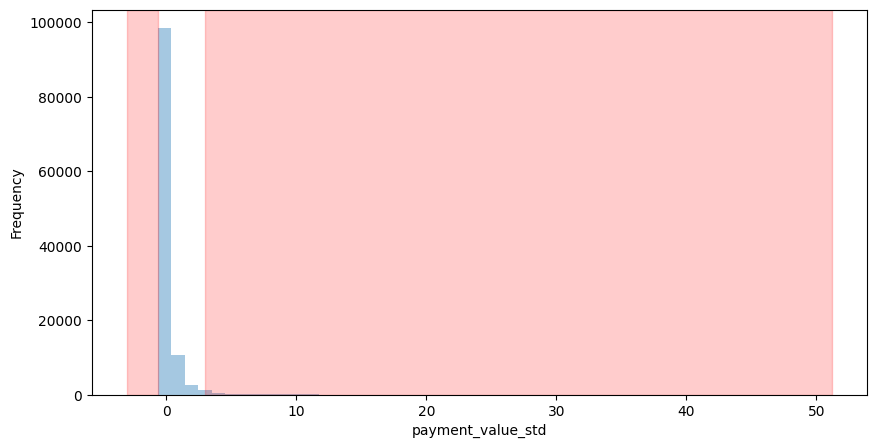

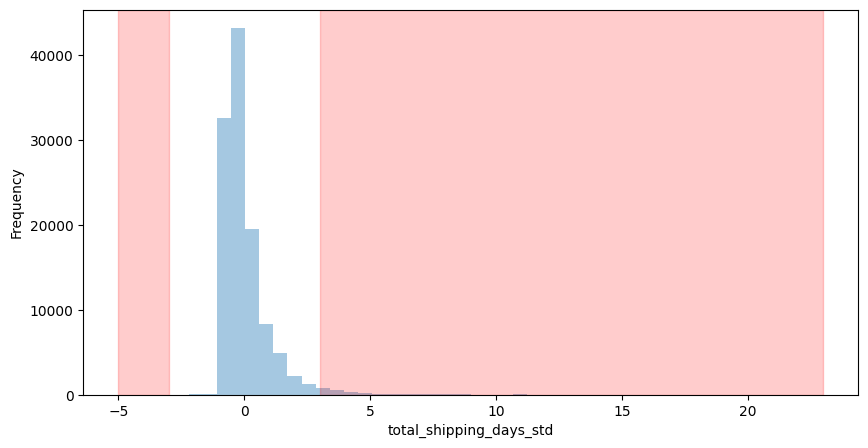

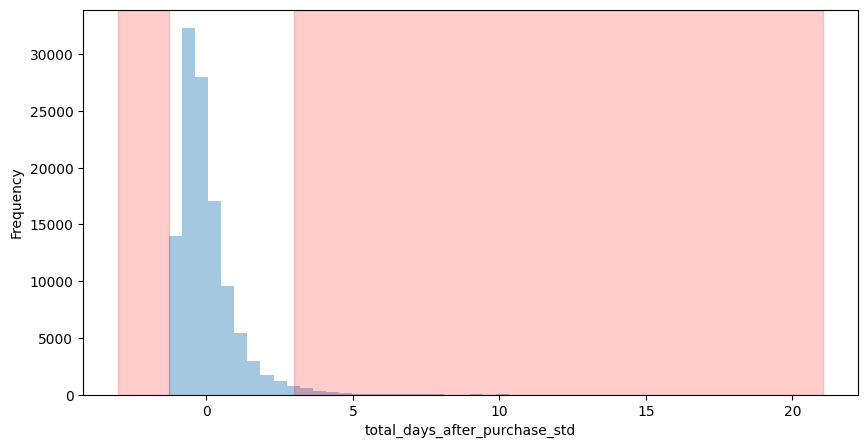

In [ ]:
plot_outliers(outlier_treatment_df,'payment_value_std')
plot_outliers(outlier_treatment_df,'total_shipping_days_std')
plot_outliers(outlier_treatment_df,'total_days_after_purchase_std')


In [ ]:
olist_df.to_csv('olist_data.csv', index=False)


##6) CONCEPT HIERARCHY GENERATION

In [ ]:
# Display all the product categories
olist_df['product_category_name_english'].value_counts()

bed_bath_table               11805
health_beauty                 9849
sports_leisure                8834
furniture_decor               8641
computers_accessories         8006
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [ ]:
#Assing higher level categories for product categories
def categorize_product(row):
    subcategory = row['product_category_name_english']
    if subcategory in ['bed_bath_table', 'furniture_decor', 'home_appliances', 'home_construction', 'home_confort',
                       'kitchen_dining_laundry_garden_furniture', 'furniture_living_room', 'furniture_bedroom',
                       'furniture_mattress_and_upholstery',  'pet_shop', 'flowers', 'home_comfort_2', 'la_cuisine', 'air_conditioning'  ]:
        return 'Home and Furniture'
    elif subcategory in ['health_beauty', 'diapers_and_hygiene', 'perfumery']:
        
        return 'Health and Beauty'
    elif subcategory in ['sports_leisure', 'toys', 'cool_stuff', 'musical_instruments', 'sports_leisure', 'christmas_supplies', 'party_supplies',
                         'art', 'cine_photo', 'dvds_blu_ray', 'music','cds_dvds_musicals','arts_and_craftmanship']:
        return 'Entertainment'
    elif subcategory in ['computers_accessories', 'electronics', 'office_furniture', 'consoles_games',
                         'tablets_printing_image', 'computers', 'telephony', 'fixed_telephony', 'audio','signaling_and_security',
                         'security_and_services']:
        
        return 'Technology and Office'
    elif subcategory in ['housewares', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee']:
        
        return 'Appliances and Housewares'
    elif subcategory in ['watches_gifts','luggage_accessories', 'luggage_accessories ',
                         'fashion_bags_accessories ', 'fashion_bags_accessories', 'fashion_shoes', 'fashio_female_clothing',
                         'fashion_male_clothing', 'fashion_underwear_beach', 'fashion_childrens_clothes',
                         'fashion_sport','baby']:
        return 'Fashion and Accesories'
    elif subcategory in ['garden_tools', 'construction_tools_construction', 'costruction_tools_garden', 'construction_tools_lights',
                         'costruction_tools_tools', 'construction_tools_safety'
                         ]:
        return 'Garden and Construction'
    elif subcategory in ['auto']:
        return 'Automotive'
    elif subcategory in ['food', 'drinks', 'food_drink']:
        return 'Food and Beverages'
    elif subcategory in ['stationery', 'books_general_interest', 'books_technical', 'books_imported']:
        return 'Books and Stationery'
    elif subcategory in ['industry_commerce_and_business', 'market_place','agro_industry_and_commerce']:
        return 'Business and Industrial'
    else:
        return 'Other'

olist_df['category'] = olist_df.apply(categorize_product, axis=1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max scaling to the dataset
scaled_data = scaler.fit_transform(RFM_boxcox)

# Create a DataFrame from the scaled data
scaled_data = pd.DataFrame(scaled_data, columns=['Recency', 'Frequency', 'Monetary'])

# Print the scaled data
print(scaled_data)